# keras pre-trained resnet50/vgg19

In [1]:
from tensorflow import keras
keras.__version__

'2.2.4-tf'

In [3]:
base_model = keras.applications.resnet50.ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 495s 5us/step


In [4]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [5]:
%matplotlib inline
%load_ext tensorboard.notebook

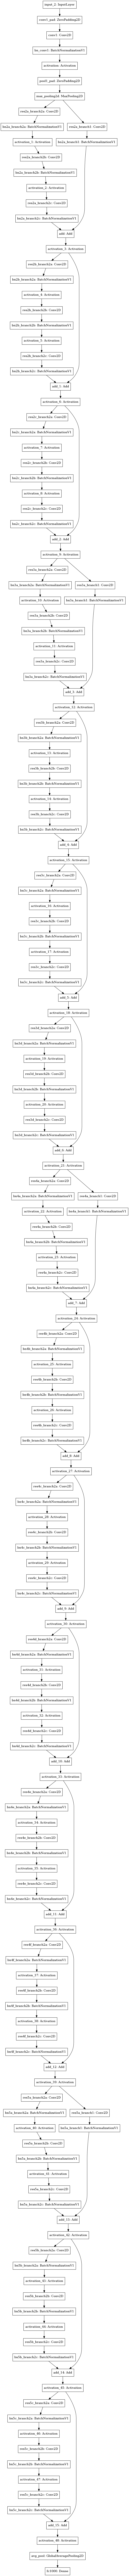

In [6]:
keras.utils.plot_model(base_model)

In [17]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 982s 6us/step


## archi

In [20]:
m = keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False)
m.summary()

/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [19]:
class scalable_img_classifier(object):
    from keras.layers import Dense, GlobalAveragePooling2D
    def __init__(self):
        self.feature_extractions = keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False)
        x = self.feature_extractions.output
        x = GlobalAveragePooling2D()(x)
        # let's add a fully-connected layer
        x = Dense(1024, activation='relu')(x)
        # and a logistic layer -- let's say we have 200 classes
        # predictions = Dense(200, activation='softmax')(x)
        
        
        # this is the model we will train
        model = Model(inputs=base_model.input, outputs=predictions)

            

In [ ]:
class incre_learning_schemer(object):
    def __init__(self):
        pass
    
    def create_learning_sessions(self, X, y, batch_number=1):
        pass

    def evaluate_past_sessions(self):
        pass

    def train_evaluate(X, y):
        pass
    